In [1]:
# fonction pour cacher une cellule
# à exécuter une fois au début pour la mettre en mémoire

from IPython.display import HTML
import random



def hide_toggle(for_next=True,texte="Montrer/cacher"):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
  

    toggle_text = texte  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        js_hide_current = this_cell + '.find("div.input").hide();'+this_cell+ '.find("div.output").hide();'

    js_f_name = f'code_toggle_{random.randint(1,2**64)}'

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
                {cell_selector}.find('div.output').toggle();
                {this_cell}.find('div.input').hide();

            }}
             $('div.prompt').hide();
         
        </script>

        <form action="javascript:{f_name}()"><input type="submit" id="toggleButton" value={toggle_text}></form>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text,
        this_cell=this_cell
    )
    

    return HTML(html)




In [2]:
# Installation des bibliothèques à exécuter une fois au début
!pip install matplotlib
!pip install scipy


# TP1 - Echelle de teinte

<h2>Travail demandé:</h2>

<ol><li> Inscrire vos réponses, programmes, images dans les blocs réponse prévus pour construire votre compte rendu</li>
<li> Vous pouvez tester et/ou modifier les différents morceaux de code proposés</li>
<li> Sauvegardez régulièrement votre travail. Attention, la sauvegarde se fait dans un espace temporaire et le fichier sera perdu au bout de quelques heures. </li>
<li> Téléchargez votre fichier au <b>format Notebook</b> si vous souhaitez pouvoir le <b>modifier plus tard</b>. Téléchargez le au <b> format html</b> si vous souhaitez simplement une <b>trace écrite</b> ou pour le rendre au professeur.</li></ol>

<h3>Matériel :</h3>
<ul><li>Arduino nano</li>
    <li>Breadboard</li>
    <li>Fils</li>
    <li>Photoresistance</li>
    <li>Resistance $1 k\Omega$</li>
    <li>laser rouge</li>
    <li>4 cuves de spectroscopie notées "4", "3", "2" et "1" contenant des solutions aqueuses de sulfate de cuivre de concentration 0,05 mol/L, 0,10 mol/L, 0,20 mol/L et 0,40 mol/L respectivement</li>
    <li>1 cuve de spectroscopie notée "Blanc" contenant uniquement le solvant (eau)</li>
    <li>1 cuve de spectroscopie notée "X" contenant une solution de sulfate de cuivre de concentration 0,175 mol/L</li>
    <li>Ordinateur</li></ul>
    <br>
<h3>Logiciels :</h3>
<ul><li>Navigateur web type Mozilla firefox</li>
    <li>IDE Arduino</li></ul>
    <br>

In [3]:
# imports à exécuter une fois au début
from math import log
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sujet
On dispose de 4 solutions aqueuses de sulfate de cuivre $Cu_{(aq)}^{2+} + SO_{4 (aq)}^{2-}$
<br>
Leur concentration massique est donnée dans le tableau suivant :


| Identifiant | Concentration (g/L) |
|-------------|---------------------|
| Blanc       |                0    |
| 1           |                64   |
| 2           |                32   |
| 3           |                16   |
| 4           |                8    | 

On dispose aussi d'une <b>cuve "X"</b> contenant une solution aqueuse de sulfate de cuivre de concentration massique inconnue.


<b>1°)</b> Que peut-on dire de l'évolution de la couleur de la solution en fonction de la concentration ?

<b>2°)</b> Encadrer alors à l'oeil la concentration de <b>la solution X</b> en comparant sa couleur à celle des solutions 1 à 4.

Cette mesure est qualitative, elle permet de comparer des concentrations. Si on veut chiffrer cette valeur, il faut réaliser une mesure quantitative de cette couleur. Nous allons donc utiliser un composant dont la résistance varie en fonction de la lumière qu’il reçoit : <b>la photorésistance.</b>
Pour déterminer la valeur de la résistance <b>$\boldsymbol{R_{1}}$</b> de la photorésistance, on utilise une carte Arduino et une résistance de valeur connue <b>$\boldsymbol{R_{2} = 1000\ \Omega}$</b>. Réalisez le montage de la <b>figure 1</b> sans brancher la carte à l’ordinateur.
<center><b>Figure 1. Montage à Réaliser</b>
<img src="TP1_figure1.png"></center>
Il est équivalent au montage ci-dessous :
<center><b>Figure 2. Schéma électrique équivalent</b>
<img src="TP1_figure2.png"></center>

<b>3°)</b> Quelle relation y-a-t-il entre $\boldsymbol{U_0,\ U_1\ et\ U_2}$ d'après la loi des mailles ?

<b>4°)</b> Que peut-on dire de l'intensité <b>I</b> qui traverse $\boldsymbol{R_1}$ et de celle qui traverse $\boldsymbol{R_2}$ ?

<b>5°)</b> Quelle relation y-a-t-il entre la tension $\boldsymbol{U_2}$, la résistance $\boldsymbol{R_2}$ et l'intensité <b>I</b> ?

<b>6°)</b> Même question pour $\boldsymbol{U_1{,}\ R_1\ et\ I}$.

Le montage réalisé sur la carte Arduino nous permet de mesurer U2. On connaît U0 et R2. Ce qui nous intéresse ici est la valeur de R1.
<b>7°)</b> Exprimer la valeur de la résistance <b>R<sub>1</sub></b> de la photorésistance en fonction de <b>U<sub>0</sub>, U<sub>2</sub> et R<sub>2</sub></b>.

U<sub>2</sub> est mesuré par le convertisseur analogique numérique de la carte Arduino qui numérise une tension entre 0 et 5V sur 10 bits. Ainsi, elle nous renvoie une valeur entière entre 0 et 2<sup>10</sup> - 1; 0 pour une tension de 0V et 1023 pour une tension de 5V.
<b>8°)</b> Quelle est la tension mesurée lorsque <b>la carte Arduino renvoie 534</b> ?

<b>9°)</b> Si on note <b>n</b> la valeur entière renvoyée par la carte Arduino, exprimer la valeur de la tension <b>U<sub>2</sub></b> mesurée.

<b>10°)</b> En déduire une expression de <b>R<sub>1</sub></b> en fonction de <b>U<sub>0</sub>, R<sub>2</sub> et n</b>.

<b>11°)</b> Complétez le programme Arduino <a href="./photoresistance.ino" target="_blank">photoresistance.ino</a> fourni pour qu'il renvoie la valeur de la résistance <b>R<sub>1</sub></b> environ <b>deux fois par seconde.</b>

<a href="./photoresistance_cor.ino" target="_blank">correction</a>

<p>Réalisez le montage de la <b>figure 1.</b>, faites vérifier votre montage et votre programme puis téléversez le programme vers la carte Arduino. Attention de bien régler le <b style="color:red;">type de carte, le port et le processeur</b>.</p>
<p>Nous allons maintenant réaliser des mesures de l'intensité de la lumière qui traverse un échantillon de solution. Pour cela, placer le laser rouge en face de la photorésistance comme sur la <b>figure 3.</b> Ouvrir alors le <b>moniteur série</b> du logiciel Arduino. Réglez le débit binaire à la même valeur que dans votre programme (115200 ici). Vous pouvez alors lire la valeur de la résistance R<sub>1</sub> de la photorésistance.
<p><center><b>Figure 3. Montage expérimental</b>
<img src="TP1_figure3.jpg"></center></p>

<b>12°)</b> Positionnez les différentes cuves (blanc, 1, 2, 3, 4 et X) entre le laser et la photorésistance. Notez les valeurs obtenues <b style="color:red;">dans des listes python ci-dessous</b>.

In [17]:
R = [] #rentrer ici les valeurs de resistance dans le meme ordre que dans la liste C
C = [0,8,16,32,64] #et ici les concentrations correspondantes.
Rx = 0 #rentrer ici la valeur de la résistance de la solution inconnue

<b>13°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de tracer le graphique représentant $\boldsymbol{R_1}$ <b>en fonction de la concentration</b> pour les solutions "blanc", 1, 2, 3, 4 puis exécutez le. Vous prendrez soin de mettre un titre, et des informations sur les deux axes.
<p>Vous pourrez utiliser <a href="./methode_courbe.ipynb" target="_blank">la fiche méthode fournie</a>.</p>

In [4]:
hide_toggle(texte="Correction")

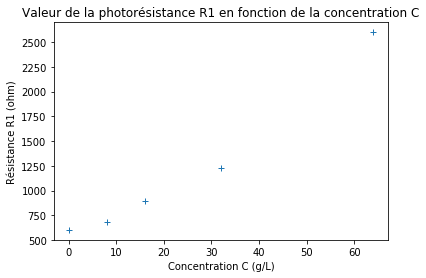

In [5]:
R = [602,681,890,1228,2600]
C = [0.,8.,16.,32.,64.]
plt.plot(C,R,"+")
plt.title("Valeur de la photorésistance R1 en fonction de la concentration C")
plt.xlabel("Concentration C (g/L)")
plt.ylabel("Résistance R1 (ohm)")
plt.show()

<b>14°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant d'importer la fonction log de la bibliothèque math puis tracez $\boldsymbol{log(R_1)}$<b> en fonction de la concentration.</b>

In [6]:
hide_toggle(texte="Correction")

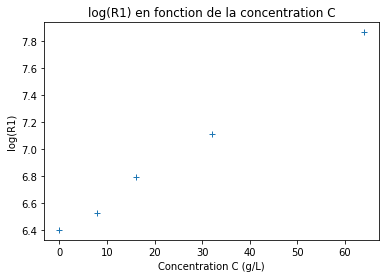

In [7]:
R = [602,681,890,1228,2600]
C = [0.,8.,16.,32.,64.]

logR = []
for val in R:
    logR.append(log(val))
    
plt.plot(C,logR,"+")
plt.title("log(R1) en fonction de la concentration C")
plt.xlabel("Concentration C (g/L)")
plt.ylabel("log(R1)")
plt.show()

<b>15°)</b> Quelle est l'allure de la courbe précédente ? 
<p>Quelle fonction mathématique vous semble adaptée pour modéliser cette série de valeurs ?</p>

On peut s'affranchir de la quantité d elumière absorbée par l'eau et la cuve en plastique en traçant $\boldsymbol{log(R_1)\ -\ log(R_1blanc)}$<b> en fonction de la concentration massique.</b>
<p><b>16°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de modéliser cette série de données par une fonction linéaire et afficher sur un même graphique les points expérimentaux, le modèle et l'équation du modèle.

In [8]:
hide_toggle(texte="Correction")

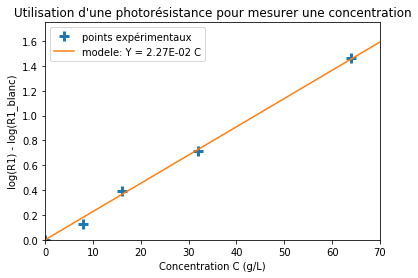

In [9]:
#Construction de la liste calculée à partir des valeurs expérimentales
logRmoinslogR0 = [log(val)-log(R[0]) for val in R]

#Tracé des points expérimentaux avec quelques paramètres facultatifs
plt.plot(C,logRmoinslogR0,"+",markersize=10.,markeredgewidth=3.,label="points expérimentaux")

#Calcul du modèle
def lineaire(x,a):
    return a*x    
params,covariance = curve_fit(lineaire,C,logRmoinslogR0)

#Construction de la liste de valeurs pour le modèle
modele=[]
x = C+[70.]
for i in x:
    modele.append(lineaire(i,*params))
    
#Tracé du modèle (avec l'équation)
plt.plot(x,modele,label="modele: Y = {:.2E} C".format(*params))

plt.xlim([0.,70.])
plt.ylim([0.,1.75])
plt.xlabel("Concentration C (g/L)")
plt.ylabel("log(R1) - log(R1_blanc)")
plt.title("Utilisation d'une photorésistance pour mesurer une concentration")
plt.legend()
plt.show()

<b>17°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de déterminer la concentration massique de la solution X à partir de l'équation du modèle précédent et de la valeur mesurée. 

In [10]:
hide_toggle(texte="Correction")

In [11]:
#On a obtenu expérimentalement R = 1134 pour la solution X
#Comme log(R) - log(Rblanc) = 0.0227 * C, alors C = (log(R) - log(Rblanc)) / 0.0227
Rx = 1134
Y = log(Rx) - log(R[0])
Cm = Y / params[0]
print("La concentration massique est de {:.2f} g/L".format(Cm))

La concentration massique est de 27.85 g/L


In [12]:
hide_toggle(texte="Pour_aller_plus_loin")

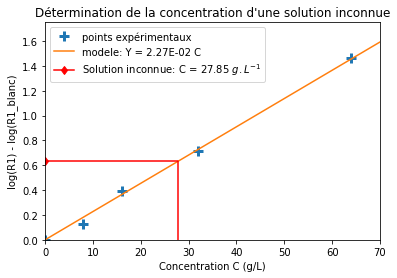

In [13]:
#Affichage sur le graphique du tracé de lecture et de la valeur

#On a obtenu expérimentalement R = 1134 pour la solution X
Rx = 1134
Y = log(Rx)-log(R[0])

#idem 16°)
plt.plot(C,logRmoinslogR0,"+",markersize=10.,markeredgewidth=3.,label="points expérimentaux")
def lineaire(x,a):
    return a*x
params,covariance = curve_fit(lineaire,C,logRmoinslogR0)
modele=[]
x = C+[70.]
for i in x:
    modele.append(lineaire(i,*params))
plt.plot(x,modele,label="modele: Y = {:.2E} C".format(*params))

#Affichage de la valeur obtenue 
plt.plot([0],[Y],marker="d",color="red",label="Solution inconnue: C = {:.2f} $g.L^{{-1}}$".format(Y/params[0]))
plt.plot([0,Y/params[0],Y/params[0]],[Y,Y,0],color="red")

plt.xlim([0.,70.])
plt.ylim([0.,1.75])
plt.xlabel("Concentration C (g/L)")
plt.ylabel("log(R1) - log(R1_blanc)")
plt.title("Détermination de la concentration d'une solution inconnue")

plt.legend()
plt.show()

Une petite remarque, on n'est même pas obligé ici de partir sur un modèle linéaire comme le suggère la loi de Beer-Lambert, on peut utiliser une loi affine avec pour ordonnée à l'origine la valeur pour le blanc.

In [14]:
hide_toggle(texte="Modèle_Affine")

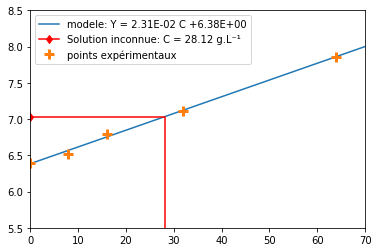

In [15]:
logR = [log(i) for i in R]

def affine(x,a,b):
    return a * x + b
    
params,covariance = curve_fit(affine,C,logR)

modele=[]
x = C+[70.]
for i in x:
    modele.append(affine(i,*params))
plt.plot(x,modele,label="modele: Y = {:.2E} C {:+.2E}".format(*params))

Rx = 1134
logRx = log(Rx)

plt.plot([0],[logRx],marker="d",color="red",label="Solution inconnue: C = {:.2f} g.L\u207B\u00B9".format((logRx-params[1])/params[0]))
plt.plot([0,(logRx-params[1])/params[0],(logRx-params[1])/params[0]],[logRx,logRx,0],color="red")

plt.plot(C,logR,"+",markersize=10.,markeredgewidth=3.,label="points expérimentaux")
plt.xlim([0.,70.])
plt.ylim([5.5,8.5])

plt.legend()
plt.show()